In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#uploading the train data
df_train = pd.read_csv(r"C:\Users\batman\Desktop\Internship\Malignant Comments Classifier Project\train.csv")
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
#uploading the test data
df_test = pd.read_csv(r'C:\Users\batman\Desktop\Internship\Malignant Comments Classifier Project\test.csv')
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
#checking the data types
print(df_train.dtypes)
print('\n\n***********************\n\n')
print(df_test.dtypes)

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object


***********************


id              object
comment_text    object
dtype: object


In [5]:
#'id' column is of no use so we will drop that column
df_train.drop(columns='id',inplace=True)
df_test.drop(columns='id',inplace=True)

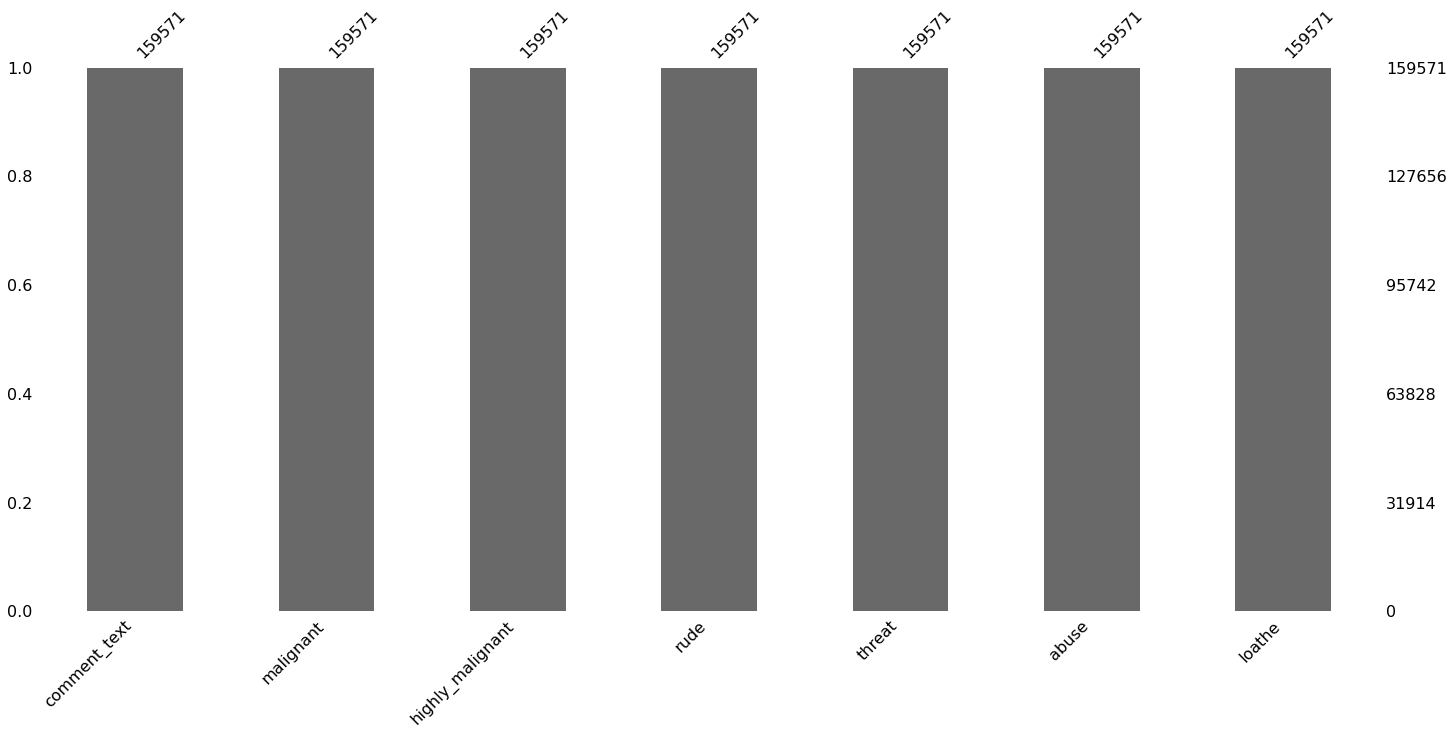

In [6]:
#checking for null values in the train data
import missingno as msno

msno.bar(df_train)

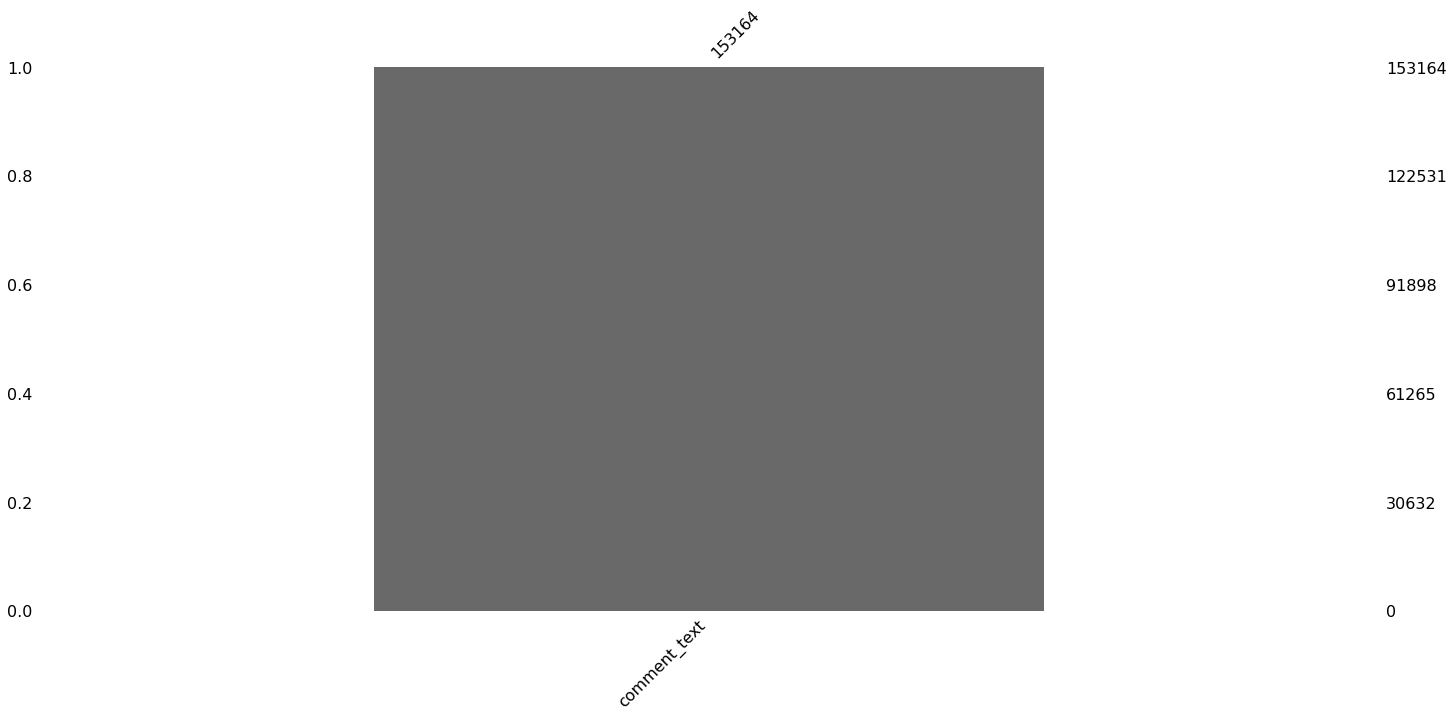

In [7]:
#checking for null values in the test data
msno.bar(df_test)

In [8]:
#checking the length of comment text in the train and test column

df_train['act_len_train'] = list(df_train.comment_text.str.len())
df_test['act_len_test'] = list(df_test.comment_text.str.len())

In [9]:
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,act_len_train
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [10]:
#now we will clean the data
#using the regular expression to clean data

#removing the email address
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailadress')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailadress')

#replacing URLs with 'webaddress'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

#replacing money symbol
df_train['comment_text'] = df_train['comment_text'].str.replace(r'£|\$','dollars')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'£|\$','dollars')

#replacing 10 digits phone number
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replacing number with 'num'
df_train['comment_text'] = df_train['comment_text'].str.replace(r'\d+(\.\d+)?','num')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'\d+(\.\d+)?','num')

#removing punctuation 
df_train['comment_text'] = df_train['comment_text'].str.replace(r'[^\w\d\s]',' ')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'[^\w\d\s]',' ')

#replacing whitespace 
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\s+',' ')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\s+',' ')

#removing leading and trailing whitespace
df_train['comment_text'] = df_train['comment_text'].str.replace(r'^\s+|\s+?$','')
df_test['comment_text'] = df_test['comment_text'].str.replace(r'^\s+|\s+?$','')

In [11]:
#let's do some final cleaning of the data

for i in range(0,len(df_train)):
    df_train.comment_text[i] = df_train.comment_text[i].lower()

for j in range(0,len(df_test)):
    df_test.comment_text[i] = df_test.comment_text[j].lower()

In [12]:
#removing stop words
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english') + ['u','i','e','f','xvi','sil','org','t','c','edu','iss','imma','gonna',])

df_train['comment_text'] = df_train['comment_text'].apply(lambda x : ' '.join(w for w in x.split() if w not in stop_words))
df_test['comment_text'] = df_test['comment_text'].apply(lambda x : ' '.join(w for w in x.split() if w not in stop_words))

In [13]:
#adding the length of new text
df_train['clean_len_train'] = df_train.comment_text.str.len()
df_test['clean_len_test'] = df_test.comment_text.str.len()

In [14]:
#comparing the length of comments before and after cleaning
df_train[['clean_len_train','act_len_train']]

,clean_len_train,act_len_train
0,166,264
1,85,112
2,141,233
3,374,622
4,29,67
...,...,...
159566,181,295
159567,44,99
159568,66,81
159569,57,116


In [15]:
#comparing the length of comments before and after cleaning
df_test[['clean_len_test','act_len_test']]

,clean_len_test,act_len_test
0,241,367
1,27,50
2,27,54
3,118,205
4,27,41
...,...,...
153159,37,60
153160,119,198
153161,251,423
153162,330,502


In [16]:
#change in the length of comments
df_train['change_len_train'] = df_train.act_len_train - df_train.clean_len_train
df_train['change_len_train']

0          98
1          27
2          92
3         248
4          38
         ... 
159566    114
159567     55
159568     15
159569     59
159570     79
Name: change_len_train, Length: 159571, dtype: int64

In [17]:
#change in the length of comments
df_test['change_len_test'] = df_test.act_len_test - df_test.clean_len_test
df_test['change_len_test']

0         126
1          23
2          27
3          87
4          14
         ... 
153159     23
153160     79
153161    172
153162    172
153163     60
Name: change_len_test, Length: 153164, dtype: int64

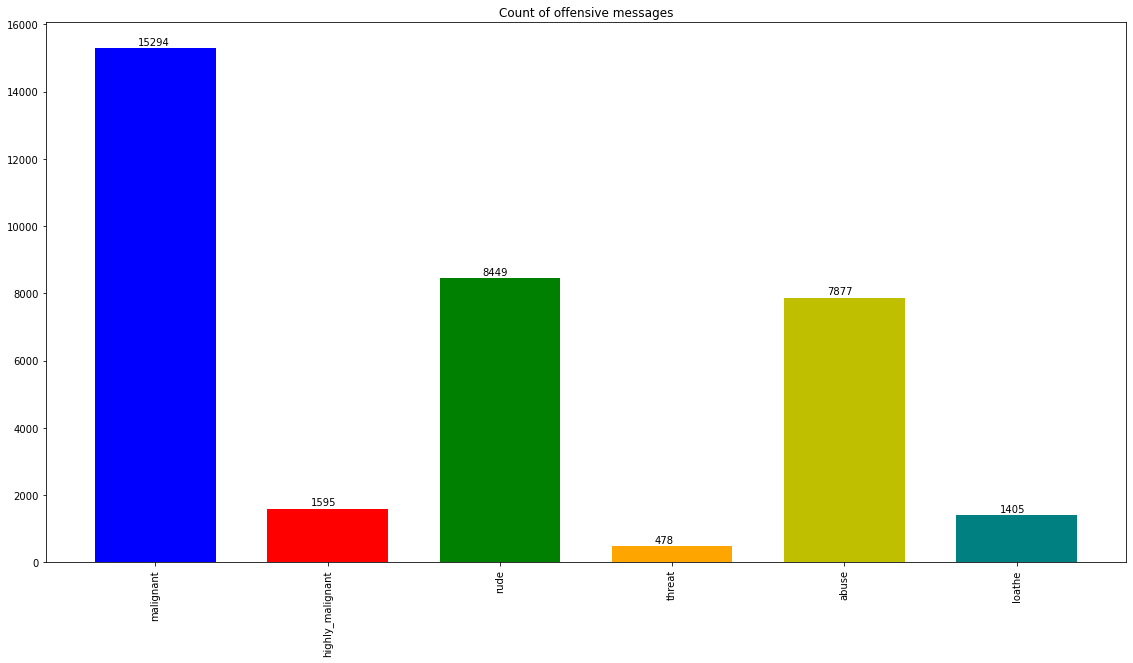

Number of malignant comments = 15294

Number of highly_malignant comments = 1595

Number of rude comments = 8449

Number of threat comments = 478

Number of abuse comments = 7877

Number of loathe comments = 1405



In [18]:
#count of offensive messages

#malignant 
mal_count = df_train[df_train['malignant']==1]['malignant'].sum()

#highly malignant
high_mal_count = df_train[df_train['highly_malignant']==1]['highly_malignant'].sum()

#rude
rude_count = df_train[df_train['rude']==1]['rude'].sum()

#threat
threat_count = df_train[df_train['threat']==1]['threat'].sum()

#abuse
ab_count = df_train[df_train['abuse']==1]['abuse'].sum()

#loathe
lot_count = df_train[df_train['loathe']==1]['loathe'].sum()

#plotting a graph
data = df_train.iloc[:,1:7].sum()

#barplot 
fig = plt.figure(figsize=(15,7.5))
ax = fig.add_axes([0,0,1,1])
ax.bar(data.index,data.values,color=['b','r','g','orange','y','teal'],width=0.7)
ax.set_title('Count of offensive messages')

for i,j,k in zip(data.values,range(0,len(data.values)+1),['b','r','g','orange','y','teal']):
    ax.text(j-0.1, i+100, str(i), color='black')

plt.xticks(rotation=90)
plt.show()

for a,b in zip(data.index,data.values):
    print('Number of {} comments = {}\n'.format(a,b))

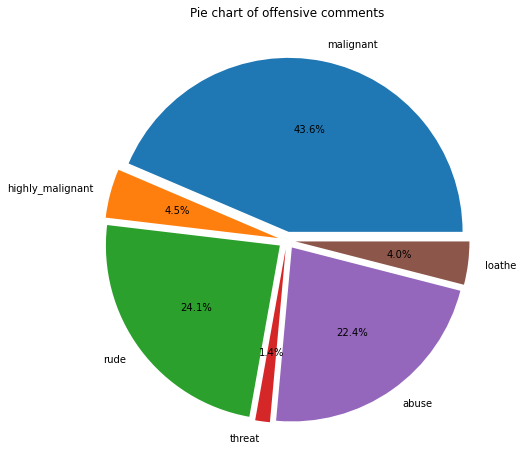

In [19]:
#percentage of comments
plt.figure(figsize=(15,8))
plt.pie(x=list(data.values),labels=list(data.index),autopct='%2.1f%%',explode=[0.05]*len(data.values))
plt.title('Pie chart of offensive comments')
plt.show()

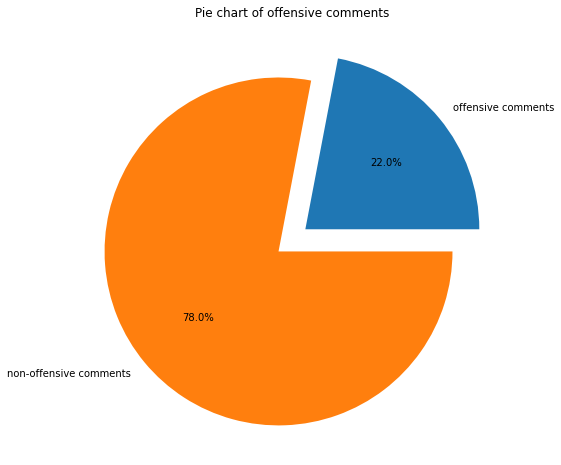

In [20]:
#offensive vs non offensive comments
plt.figure(figsize=(15,8))
plt.pie(x=[sum(data.values)]+[len(df_train)-sum(data.values)],labels=['offensive comments','non-offensive comments'],autopct='%2.1f%%',explode=[0.1,0.1])
plt.title('Pie chart of offensive comments')
plt.show()

Average length of actual malignant comments : 295.414280109847
Maximum length : 5000
Minimum length : 8


Average length of cleaned malignant comments : 188.6214201647705
Maximum length : 5000
Minimum length : 1




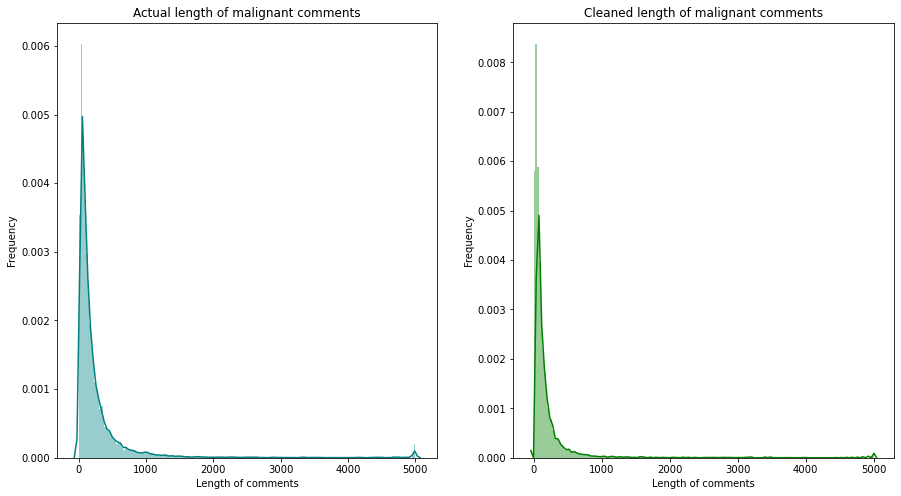

In [21]:
#distribution of length of malignant comments
fig,ax = plt.subplots(1,2,figsize=(15,8))

#--------------------actual length-----------------------------
#malignant
sns.distplot(df_train[df_train['malignant']==1]['act_len_train'],ax=ax[0],bins=200,color='teal')
ax[0].set_title('Actual length of malignant comments')
ax[0].set_xlabel('Length of comments')
ax[0].set_ylabel('Frequency')


#--------------------cleaned length----------------------------
#malignant
sns.distplot(df_train[df_train['malignant']==1]['clean_len_train'],ax=ax[1],bins=200,color='green')
ax[1].set_title('Cleaned length of malignant comments')
ax[1].set_xlabel('Length of comments')
ax[1].set_ylabel('Frequency')

fig.show()

print('Average length of actual malignant comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['malignant']==1]['act_len_train']),max(df_train[df_train['malignant']==1]['act_len_train']),min(df_train[df_train['malignant']==1]['act_len_train'])))
print('Average length of cleaned malignant comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['malignant']==1]['clean_len_train']),max(df_train[df_train['malignant']==1]['clean_len_train']),min(df_train[df_train['malignant']==1]['clean_len_train'])))


Average length of actual highly malignant comments : 453.95548589341695
Maximum length : 5000
Minimum length : 8


Average length of cleaned highly malignant comments : 308.292789968652
Maximum length : 5000
Minimum length : 4




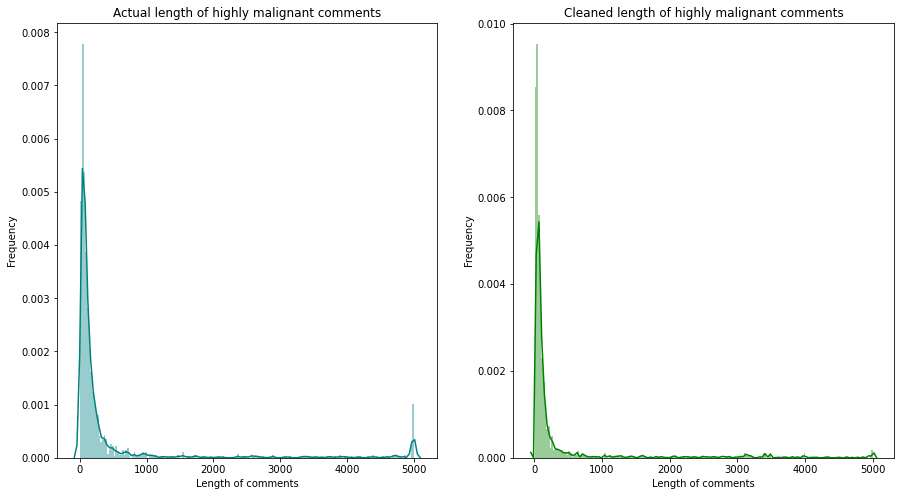

In [22]:
#distribution of length of highly malignant comments
fig,ax = plt.subplots(1,2,figsize=(15,8))

#--------------------actual length-----------------------------
sns.distplot(df_train[df_train['highly_malignant']==1]['act_len_train'],ax=ax[0],bins=200,color='teal')
ax[0].set_title('Actual length of highly malignant comments')
ax[0].set_xlabel('Length of comments')
ax[0].set_ylabel('Frequency')


#--------------------cleaned length----------------------------
sns.distplot(df_train[df_train['highly_malignant']==1]['clean_len_train'],ax=ax[1],bins=200,color='green')
ax[1].set_title('Cleaned length of highly malignant comments')
ax[1].set_xlabel('Length of comments')
ax[1].set_ylabel('Frequency')

fig.show()

print('Average length of actual highly malignant comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['highly_malignant']==1]['act_len_train']),max(df_train[df_train['highly_malignant']==1]['act_len_train']),min(df_train[df_train['highly_malignant']==1]['act_len_train'])))
print('Average length of cleaned highly malignant comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['highly_malignant']==1]['clean_len_train']),max(df_train[df_train['highly_malignant']==1]['clean_len_train']),min(df_train[df_train['highly_malignant']==1]['clean_len_train'])))


Average length of actual rude comments : 286.93727068292105
Maximum length : 5000
Minimum length : 8


Average length of cleaned rude comments : 185.89904130666352
Maximum length : 5000
Minimum length : 1




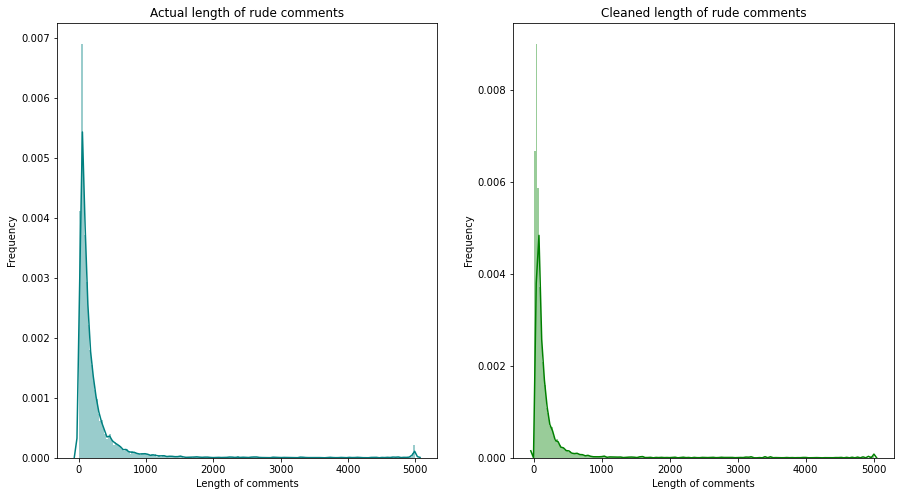

In [23]:
#distribution of length of rude comments
fig,ax = plt.subplots(1,2,figsize=(15,8))

#--------------------actual length-----------------------------
sns.distplot(df_train[df_train['rude']==1]['act_len_train'],ax=ax[0],bins=200,color='teal')
ax[0].set_title('Actual length of rude comments')
ax[0].set_xlabel('Length of comments')
ax[0].set_ylabel('Frequency')


#--------------------cleaned length----------------------------
sns.distplot(df_train[df_train['rude']==1]['clean_len_train'],ax=ax[1],bins=200,color='green')
ax[1].set_title('Cleaned length of rude comments')
ax[1].set_xlabel('Length of comments')
ax[1].set_ylabel('Frequency')

fig.show()

print('Average length of actual rude comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['rude']==1]['act_len_train']),max(df_train[df_train['rude']==1]['act_len_train']),min(df_train[df_train['rude']==1]['act_len_train'])))
print('Average length of cleaned rude comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['rude']==1]['clean_len_train']),max(df_train[df_train['rude']==1]['clean_len_train']),min(df_train[df_train['rude']==1]['clean_len_train'])))


Average length of actual threat comments : 308.81589958159
Maximum length : 5000
Minimum length : 19


Average length of cleaned threat comments : 179.65481171548117
Maximum length : 3707
Minimum length : 3




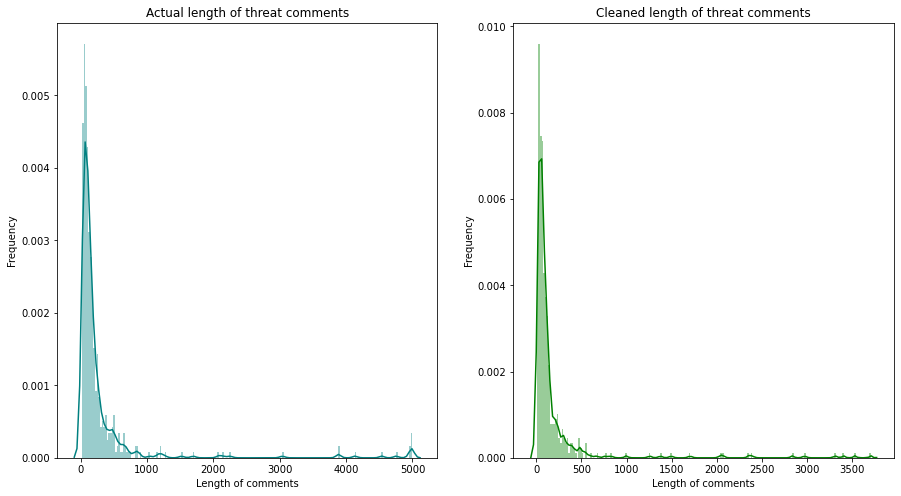

In [24]:
#distribution of length of threat comments
fig,ax = plt.subplots(1,2,figsize=(15,8))

#--------------------actual length-----------------------------
sns.distplot(df_train[df_train['threat']==1]['act_len_train'],ax=ax[0],bins=200,color='teal')
ax[0].set_title('Actual length of threat comments')
ax[0].set_xlabel('Length of comments')
ax[0].set_ylabel('Frequency')


#--------------------cleaned length----------------------------
sns.distplot(df_train[df_train['threat']==1]['clean_len_train'],ax=ax[1],bins=200,color='green')
ax[1].set_title('Cleaned length of threat comments')
ax[1].set_xlabel('Length of comments')
ax[1].set_ylabel('Frequency')

fig.show()

print('Average length of actual threat comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['threat']==1]['act_len_train']),max(df_train[df_train['threat']==1]['act_len_train']),min(df_train[df_train['threat']==1]['act_len_train'])))
print('Average length of cleaned threat comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['threat']==1]['clean_len_train']),max(df_train[df_train['threat']==1]['clean_len_train']),min(df_train[df_train['threat']==1]['clean_len_train'])))


Average length of actual abuse comments : 277.4152596166053
Maximum length : 5000
Minimum length : 8


Average length of cleaned abuse comments : 178.49574711184462
Maximum length : 5000
Minimum length : 1




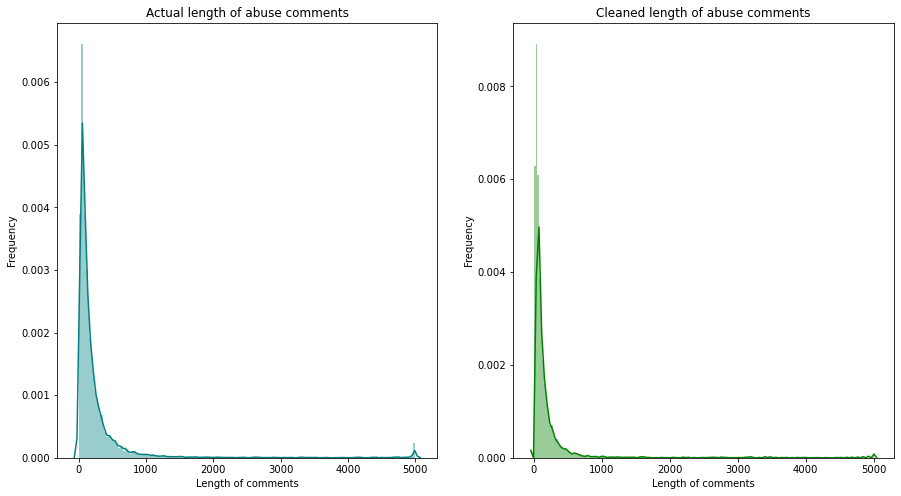

In [25]:
#distribution of length of abuse comments
fig,ax = plt.subplots(1,2,figsize=(15,8))

#--------------------actual length-----------------------------
sns.distplot(df_train[df_train['abuse']==1]['act_len_train'],ax=ax[0],bins=200,color='teal')
ax[0].set_title('Actual length of abuse comments')
ax[0].set_xlabel('Length of comments')
ax[0].set_ylabel('Frequency')


#--------------------cleaned length----------------------------
sns.distplot(df_train[df_train['abuse']==1]['clean_len_train'],ax=ax[1],bins=200,color='green')
ax[1].set_title('Cleaned length of abuse comments')
ax[1].set_xlabel('Length of comments')
ax[1].set_ylabel('Frequency')

fig.show()

print('Average length of actual abuse comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['abuse']==1]['act_len_train']),max(df_train[df_train['abuse']==1]['act_len_train']),min(df_train[df_train['abuse']==1]['act_len_train'])))
print('Average length of cleaned abuse comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['abuse']==1]['clean_len_train']),max(df_train[df_train['abuse']==1]['clean_len_train']),min(df_train[df_train['abuse']==1]['clean_len_train'])))

Average length of actual loathe comments : 308.7224199288256
Maximum length : 5000
Minimum length : 18


Average length of cleaned loathe comments : 217.33096085409252
Maximum length : 5000
Minimum length : 5




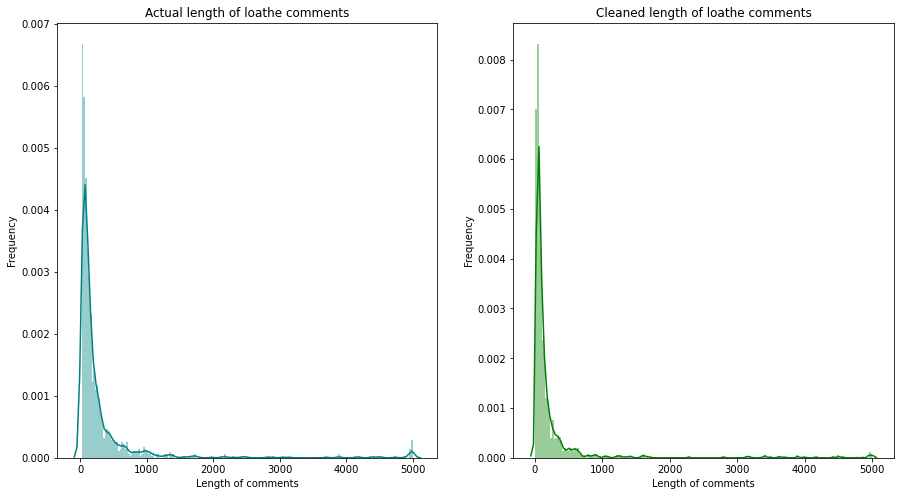

In [26]:
#distribution of length of loathe comments
fig,ax = plt.subplots(1,2,figsize=(15,8))

#--------------------actual length-----------------------------
sns.distplot(df_train[df_train['loathe']==1]['act_len_train'],ax=ax[0],bins=200,color='teal')
ax[0].set_title('Actual length of loathe comments')
ax[0].set_xlabel('Length of comments')
ax[0].set_ylabel('Frequency')


#--------------------cleaned length----------------------------
sns.distplot(df_train[df_train['loathe']==1]['clean_len_train'],ax=ax[1],bins=200,color='green')
ax[1].set_title('Cleaned length of loathe comments')
ax[1].set_xlabel('Length of comments')
ax[1].set_ylabel('Frequency')

fig.show()

print('Average length of actual loathe comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['loathe']==1]['act_len_train']),max(df_train[df_train['loathe']==1]['act_len_train']),min(df_train[df_train['loathe']==1]['act_len_train'])))
print('Average length of cleaned loathe comments : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train[df_train['loathe']==1]['clean_len_train']),max(df_train[df_train['loathe']==1]['clean_len_train']),min(df_train[df_train['loathe']==1]['clean_len_train'])))


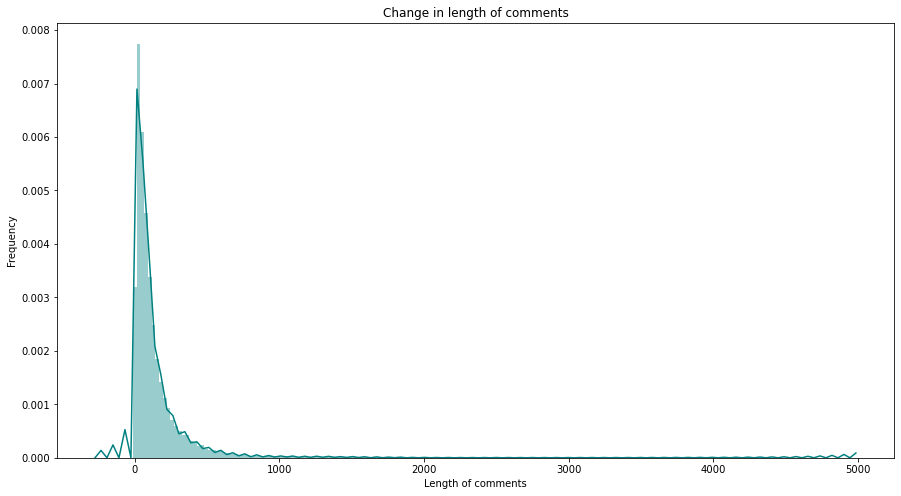

Average change in comment length : 142.6951513746232
Maximum length : 4958
Minimum length : -247




In [27]:
#distribution of change in length
fig = plt.subplots(1,1,figsize=(15,8))

#--------------------change length-----------------------------
sns.distplot(df_train['change_len_train'],bins=200,color='teal')
plt.title('Change in length of comments')
plt.xlabel('Length of comments')
plt.ylabel('Frequency')
plt.show()

print('Average change in comment length : {}\nMaximum length : {}\nMinimum length : {}\n\n'.format(np.mean(df_train['change_len_train']),max(df_train['change_len_train']),min(df_train['change_len_train'])))

In [28]:
#defining a function for wordcloud 
from wordcloud import WordCloud
def word_cloud(data,filename):
    w_cloud = WordCloud(width=700,height=500,background_color = 'white',max_words=25).generate(' '.join(data))
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(w_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(r'C:\Users\batman\Desktop\{}.png'.format(filename))
    plt.show()

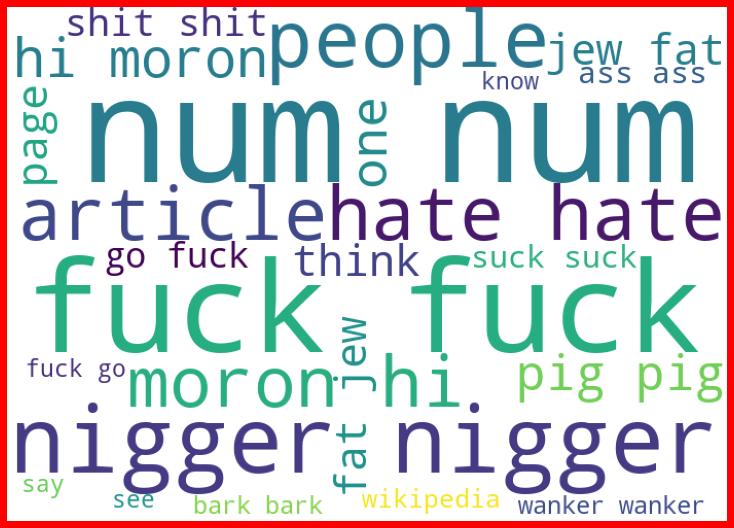

In [29]:
#-----------malignant comments--------------
data = df_train[df_train['malignant']==1]['comment_text']
filename = 'malignant'
word_cloud(data,filename)

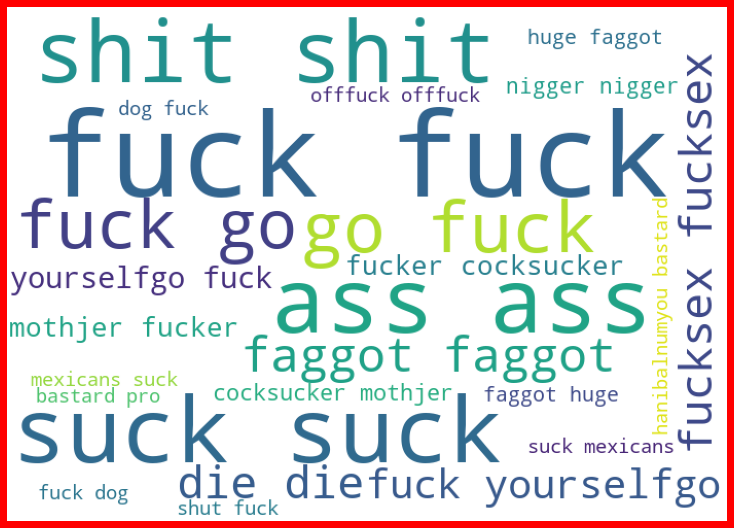

In [30]:
#-------highly malignant---------
data = df_train[df_train['highly_malignant']==1]['comment_text']
filename = 'highly_malignant'
word_cloud(data,filename)

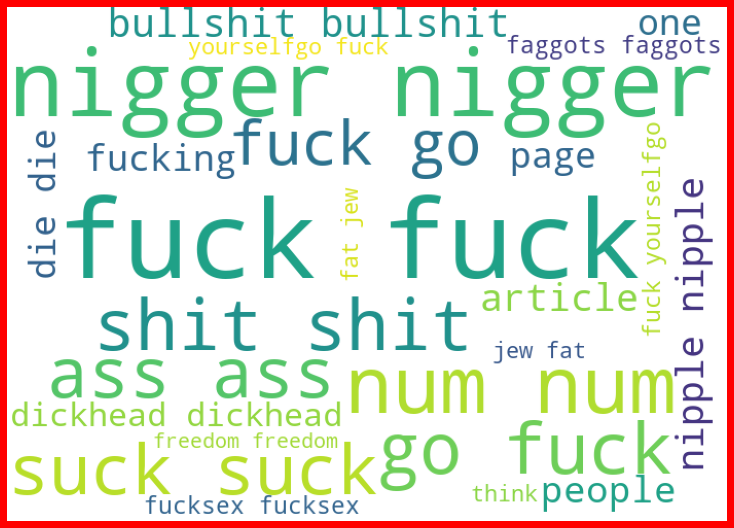

In [31]:
#-----------rude------------
data = df_train[df_train['rude']==1]['comment_text']
filename = 'rude'
word_cloud(data,filename)

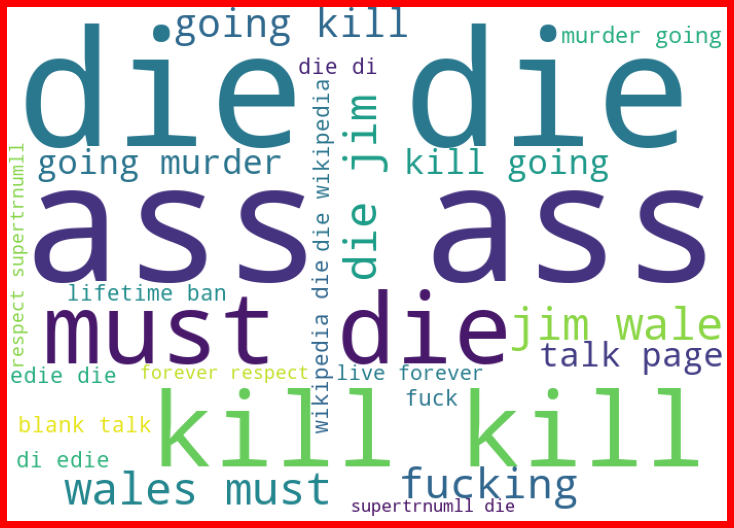

In [32]:
#--------------threat---------------
data= df_train[df_train['threat']==1]['comment_text']
filename = 'threat'
word_cloud(data,filename)

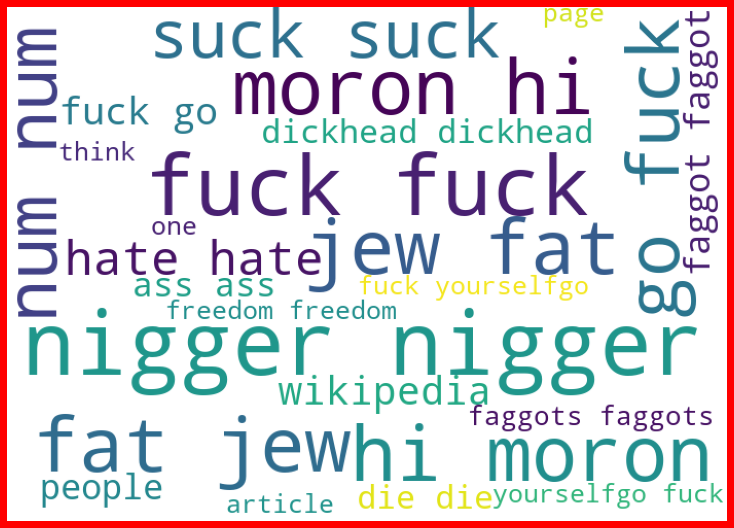

In [33]:
#-----------abuse------------
data = df_train[df_train['abuse']==1]['comment_text']
filename = 'abuse'
word_cloud(data,filename)

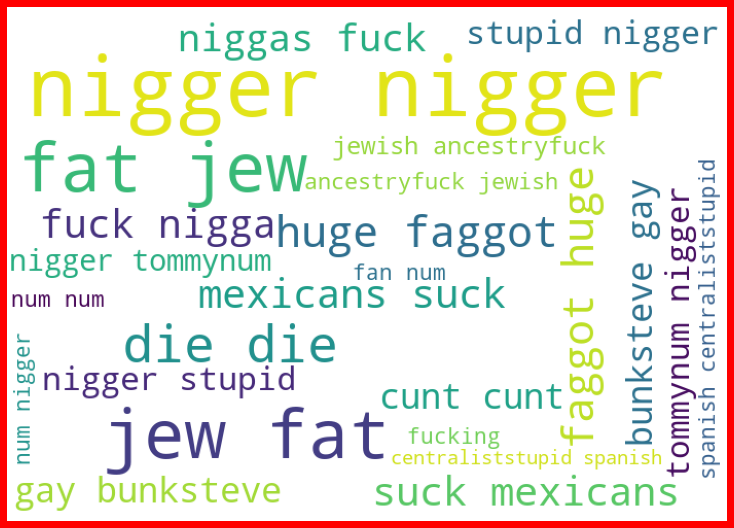

In [34]:
#----------loathe-----------
data = df_train[df_train['loathe']==1]['comment_text']
filename = 'loathe'
word_cloud(data,filename)

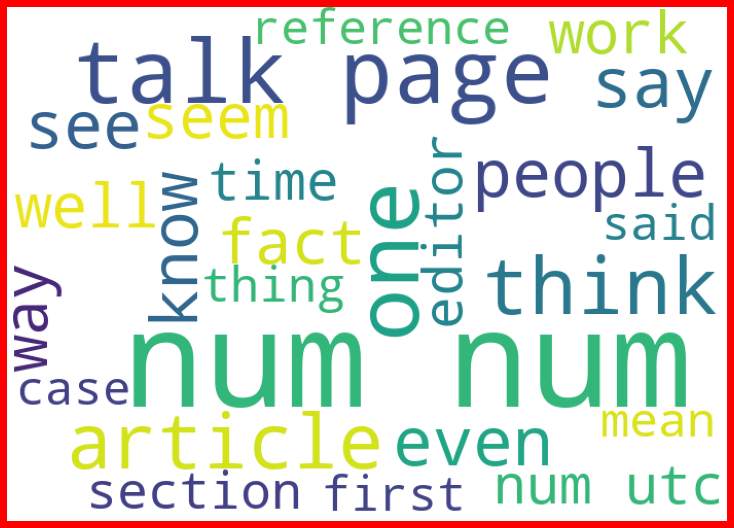

In [35]:
#-------------non offensive comments----------------
data = df_train[(df_train['malignant']==0) & (df_train['highly_malignant']==0) & (df_train['rude']==0) & 
                (df_train['threat']==0) & (df_train['abuse']==0) & (df_train['loathe']==0)]['comment_text']
filename = 'non-offensive'
word_cloud(data,filename)

In [59]:
#using Tf-idf vectorizer to convert the texts into vectors

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(lowercase=True,analyzer='word',stop_words='english',max_features=5000,ngram_range=(1,2))
X = vect.fit_transform(df_train['comment_text'])


In [37]:
vect.vocabulary_

{'explanation': 1578,
 'edits': 1421,
 'username': 4678,
 'fan': 1640,
 'reverted': 3795,
 'gas': 1846,
 'voted': 4767,
 'new': 2873,
 'york': 4987,
 'fac': 1599,
 'remove': 3708,
 'template': 4400,
 'talk': 4366,
 'page': 3136,
 'retired': 3782,
 'num': 2958,
 'new york': 2881,
 'talk page': 4370,
 'num num': 2997,
 'matches': 2689,
 'background': 405,
 'colour': 811,
 'stuck': 4245,
 'thanks': 4429,
 'january': 2339,
 'utc': 4689,
 'thanks talk': 4433,
 'talk num': 4369,
 'num january': 2982,
 'january num': 2340,
 'num utc': 3011,
 'hey': 2035,
 'man': 2657,
 'really': 3606,
 'trying': 4544,
 'edit': 1393,
 'war': 4791,
 'guy': 1954,
 'constantly': 921,
 'removing': 3713,
 'relevant': 3688,
 'information': 2230,
 'talking': 4373,
 'instead': 2250,
 'care': 637,
 'formatting': 1765,
 'actual': 53,
 'info': 2226,
 'edit war': 1404,
 'make': 2641,
 'real': 3599,
 'suggestions': 4300,
 'improvement': 2180,
 'section': 3933,
 'statistics': 4207,
 'later': 2450,
 'subsection': 4275,
 'typ

In [38]:

from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import multilabel_confusion_matrix


In [60]:
#splitting train and test data
Y = df_train.iloc[:,1:7]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

#defining jaccard score
def j_score(y_val,y_pred):
    jaccard = np.minimum(y_val,y_pred).sum(axis=1)/np.maximum(y_val,y_pred).sum(axis=1)
    return jaccard.mean()*100

(111699, 5000) (111699, 6)
(47872, 5000) (47872, 6)


In [40]:
classifiers = [MultinomialNB(),LogisticRegression(),LinearSVC(),SGDClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for i in classifiers:
    clf = OneVsRestClassifier(i)
    
    #training the model
    clf.fit(x_train,y_train)
    
    #getting prediction from the model
    pred_train = clf.predict(x_train)
    pred_test = clf.predict(x_test)
    
    #checking jaccard score of the model
    train_score = jaccard_score(y_train,pred_train,average = 'weighted')
    test_score = jaccard_score(y_test,pred_test, average='weighted')
    
    #checking the confusion matrix
    con_mat_train = multilabel_confusion_matrix(y_train,pred_train)
    con_mat_test = multilabel_confusion_matrix(y_test,pred_test)
    
    #jaccard
    js1 = j_score(y_train,pred_train)
    js2 = j_score(y_test,pred_test)
    print('For model {}\nTrain accuracy : {}*******Test accuracy : {}\n\nTrain confusion matrix : {}\n\nTest confusion matrix : {}\n\n\n\n'.format(i,train_score,test_score,con_mat_train,con_mat_test))
    print('Jaccard Train Score : {}\n\nJaccard Test Score : {}'.format(js1,js2))

For model MultinomialNB()
Train accuracy : 0.0375586770397825*******Test accuracy : 0.035504400623885914

Train confusion matrix : [[[100534    453]
  [  5050   5662]]

 [[110363    227]
  [   810    299]]

 [[105416    390]
  [  2502   3391]]

 [[111322     35]
  [   341      1]]

 [[105611    600]
  [  2766   2722]]

 [[110633     93]
  [   868    105]]]

Test confusion matrix : [[[43098   192]
  [ 2215  2367]]

 [[47300    86]
  [  375   111]]

 [[45158   158]
  [ 1170  1386]]

 [[47719    17]
  [  136     0]]

 [[45220   263]
  [ 1306  1083]]

 [[47399    41]
  [  393    39]]]




Jaccard Train Score : 35.86311050321987

Jaccard Test Score : 34.006936107776376
For model LogisticRegression()
Train accuracy : 0.04611411024270584*******Test accuracy : 0.04326676693404634

Train confusion matrix : [[[100438    549]
  [  4139   6573]]

 [[110383    207]
  [   848    261]]

 [[105482    324]
  [  1983   3910]]

 [[111337     20]
  [   301     41]]

 [[105654    557]
  [  2492   2996]]

 

In [61]:
#let's do some hyperparameter tuning to get the best accuracy and reduced over fitting in models like decision tree and random forest classifier 
#Linear SVC
svc = LinearSVC(C=1.5,penalty='l1',dual=False)
clf_svc = OneVsRestClassifier(svc)
clf_svc.fit(x_train,y_train)
pred = clf_svc.predict(x_test)
con_mat = multilabel_confusion_matrix(y_test,pred)
print('For linear SVC \nAccuracy score : {}'.format(j_score(y_test,pred)))
print('\nConfusion Matrix : \n',con_mat)

For linear SVC 
Accuracy score : 44.29177923581623

Confusion Matrix : 
 [[[42852   438]
  [ 1583  2999]]

 [[47308    78]
  [  379   107]]

 [[45101   215]
  [  805  1751]]

 [[47718    18]
  [  103    33]]

 [[45138   345]
  [ 1063  1326]]

 [[47393    47]
  [  334    98]]]


In [63]:
#predicting the test values
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(lowercase=True,analyzer='word',stop_words='english',max_features=5000,ngram_range=(1,2))
x = vect.fit_transform(df_test['comment_text'])

pred_test = clf_svc.predict(x)

#saving predicted values
pred_values = pd.DataFrame(data=pred_test)
pred_values.to_csv(r'C:\Users\batman\Desktop\Internship\Predicted_Test_Values.csv')

In [64]:
import joblib
joblib.dump(clf_svc,'Malignant_comment_classification.obj')

['Malignant_comment_classification.obj']